<a href="https://colab.research.google.com/github/entenam/TF-Intro/blob/main/FashionMnistCNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Import TensorFlow and Necessary Dependancies

import os
import tensorflow as tf
import matplotlib.pyplot as plt

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
#Custom Callback Function to Terminate Training at 90% Accuracy
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epochs, logs={}):
    if logs.get('accuracy') > 0.9:
      self.model.stop_training = True

In [4]:
#Load Mnist Datasets from Keras

mnist = tf.keras.datasets.fashion_mnist

(training_images, training_labels), (testing_images, testing_labels) = mnist.load_data()

#Reshape Images to 28x28 Gray Scale and Normalize the Value to 0~1
(training_images, testing_images) = (training_images.reshape(60000, 28, 28, 1)/255, testing_images.reshape(10000, 28, 28, 1)/255)

4431872/4422102 [==============================] - 0s 0us/step


In [ ]:
#Create Model and Compile
model = tf.keras.models.Sequential([
                                    tf.keras.layers.Conv2D(64, (3,3),activation=tf.nn.relu,input_shape=(28,28,1)),
                                    tf.keras.layers.MaxPool2D(2,2),
                                    tf.keras.layers.Conv2D(64, (3,3), activation=tf.nn.relu),
                                    tf.keras.layers.MaxPool2D(2,2),
                                    tf.keras.layers.Flatten(),
                                    tf.keras.layers.Dense(128, activation=tf.nn.relu),
                                    tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])

model.compile(optimizer='Adam',loss='sparse_categorical_crossentropy',metrics='accuracy')

In [5]:
#Save Model Checkpoint to Google Drive During Training
checkpoint_path = "/content/drive/My Drive/AI Basics with Tensorflow/FashionMnistCNN/cp.ckpt"
checkpoint_dir = os.path.dirname(checkpoint_path)

# Create a callback that saves the model's weights
cp_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,
                                                 save_weights_only=True,
                                                 verbose=1)
# Custom Callback for Termination of Training at Desired Accuracy
callback = myCallback()

In [ ]:
# Train the Model
model.fit(training_images, training_labels, epochs=10, callbacks=[callback, cp_callback])
model.evaluate(testing_images, testing_labels)

In [6]:
#Reload Model from GDrive Using Checkpoint and Evaluate to See the Same Result

reloaded_model = tf.keras.models.Sequential([
                                    tf.keras.layers.Conv2D(64, (3,3),activation=tf.nn.relu,input_shape=(28,28,1)),
                                    tf.keras.layers.MaxPool2D(2,2),
                                    tf.keras.layers.Conv2D(64, (3,3), activation=tf.nn.relu),
                                    tf.keras.layers.MaxPool2D(2,2),
                                    tf.keras.layers.Flatten(),
                                    tf.keras.layers.Dense(128, activation=tf.nn.relu),
                                    tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])

reloaded_model.compile(optimizer='Adam',loss='sparse_categorical_crossentropy',metrics='accuracy')

checkpoint_path = "/content/drive/My Drive/AI Basics with Tensorflow/FashionMnistCNN/cp.ckpt"
checkpoint_dir = os.path.dirname(checkpoint_path)

reloaded_model.load_weights(checkpoint_path)

reloaded_model.evaluate(testing_images, testing_labels)

313/313 [==============================] - 5s 14ms/step - loss: 0.2963 - accuracy: 0.8889


[0.29625430703163147, 0.8888999819755554]

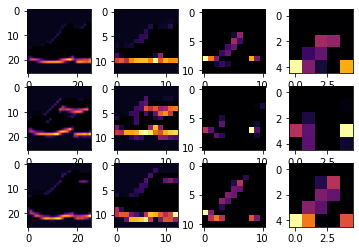

In [9]:
#Check the Output of Convoluted Layers for Analysis

import matplotlib.pyplot as plt
f, axarr = plt.subplots(3,4)
FIRST_IMAGE=0
SECOND_IMAGE=23
THIRD_IMAGE=28
CONVOLUTION_NUMBER = 1
from tensorflow.keras import models
layer_outputs = [layer.output for layer in reloaded_model.layers]
activation_model = tf.keras.models.Model(inputs = reloaded_model.input, outputs = layer_outputs)
for x in range(0,4):
  f1 = activation_model.predict(testing_images[FIRST_IMAGE].reshape(1, 28, 28, 1))[x]
  axarr[0,x].imshow(f1[0, : , :, CONVOLUTION_NUMBER], cmap='inferno')
  axarr[0,x].grid(False)
  f2 = activation_model.predict(testing_images[SECOND_IMAGE].reshape(1, 28, 28, 1))[x]
  axarr[1,x].imshow(f2[0, : , :, CONVOLUTION_NUMBER], cmap='inferno')
  axarr[1,x].grid(False)
  f3 = activation_model.predict(testing_images[THIRD_IMAGE].reshape(1, 28, 28, 1))[x]
  axarr[2,x].imshow(f3[0, : , :, CONVOLUTION_NUMBER], cmap='inferno')
  axarr[2,x].grid(False)